In [1]:
%matplotlib inline

In [2]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

In [ ]:
PATH = '..//..//..//shared-aqua-ai//combined//preliminary-data-optiqua-Debietmeter Rosteyne Zelzate.csv'

In [3]:

df = pd.read_csv(PATH)
df


Sensor            Timestamp  DetectorB1  DetectorB2  DetectorB3  \
0         Mgd  2017-01-16 16:56:18    0.000000    0.000000    0.000000   
1         Mgd  2017-01-16 16:57:18    0.000000    0.000000    0.000000   
2         Mgd  2017-01-16 16:58:18    0.000000    0.000000    0.000000   
3         Mgd  2017-01-16 16:59:18    0.000000    0.000000    0.000000   
4         Mgd  2017-01-16 17:00:18    0.000000    0.000000    0.000000   
...       ...                  ...         ...         ...         ...   
938848    Mgd  2019-01-16 13:19:41    0.008949    0.013228    0.008949   
938849    Mgd  2019-01-16 13:20:41    0.013866    0.018145    0.013866   
938850    Mgd  2019-01-16 13:21:41    0.016585    0.020863    0.016585   
938851    Mgd  2019-01-16 13:22:41    0.014603    0.018881    0.014603   
938852    Mgd  2019-01-16 13:23:41    0.013921    0.018200    0.013921   

        F24Response    Response  SignalHealth  Threshold1  Threshold2  \
0          0.000211    4.923002      0.761930         1.0         1.5   
1         -0.000360    4.923002      0.761930         1.0         1.5   
2         -0.000126    4.923002      0.761930         1.0         1.5   
3         -0.000048    4.923002      0.761930         1.0         1.5   
4         -0.000018    4.923002      0.761930         1.0         1.5   
...             ...         ...           ...         ...         ...   
938848     0.035406  264.735797      0.711636         1.0         1.5   
938849     0.040268  264.741096      0.711611         1.0         1.5   
938850     0.042929  264.744196      0.711463         1.0         1.5   
938851     0.040891  264.742596      0.711482         1.0         1.5   
938852     0.040155  264.742296      0.711325         1.0         1.5   

        temperature  
0             4.981  
1             5.002  
2             4.994  
3             4.985  
4             4.977  
...             ...  
938848        7.080  
938849        7.141  
938850        7.195  
938851        7.074  
938852        6.909  

[938853 rows x 11 columns]

In [4]:
def generate_prophet_dataframe(df, col_time, col_predict):
    
    """"""
    
    df_prophet = df[[col_time, col_predict]].copy()
    df_prophet.rename({col_time : "ds", 
                      col_predict : "y"
                      }, axis = 1, inplace = True)
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'] )
    return df_prophet
    

In [5]:
df_prophet = generate_prophet_dataframe(df = df, 
                           col_time = "Timestamp" ,
                           col_predict = "DetectorB1")
df_prophet

ds         y
0      2017-01-16 16:56:18  0.000000
1      2017-01-16 16:57:18  0.000000
2      2017-01-16 16:58:18  0.000000
3      2017-01-16 16:59:18  0.000000
4      2017-01-16 17:00:18  0.000000
...                    ...       ...
938848 2019-01-16 13:19:41  0.008949
938849 2019-01-16 13:20:41  0.013866
938850 2019-01-16 13:21:41  0.016585
938851 2019-01-16 13:22:41  0.014603
938852 2019-01-16 13:23:41  0.013921

[938853 rows x 2 columns]

In [6]:
# Python
# We fit the model by instantiating a new Prophet object. 
# Any settings to the forecasting procedure are passed into the constructor. 
# Then you call its fit method and pass in the historical dataframe. Fitting should take 1-5 seconds.
m = Prophet(yearly_seasonality=True)
m.fit(df_prophet)

In [7]:
# Python
# Predictions are then made on a dataframe with a column ds containing the dates for which a prediction is to be made. 
# You can get a suitable dataframe that extends into the future a specified number of days 
# using the helper method Prophet.make_future_dataframe.
# By default it will also include the dates from the history, so we will see the model fit as well.
future = m.make_future_dataframe(periods=14) # where periods is the number of days 
future.tail()

ds
938595 2019-01-26 13:23:41
938596 2019-01-27 13:23:41
938597 2019-01-28 13:23:41
938598 2019-01-29 13:23:41
938599 2019-01-30 13:23:41

In [8]:
# The predict method will assign each row in future a predicted value which it names yhat. 
# If you pass in historical dates, it will provide an in-sample fit. 
# The forecast object here is a new dataframe that includes a column yhat with the forecast, 
# as well as columns for components and uncertainty intervals.
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
938595 2019-01-26 13:23:41  0.002346   -0.010000    0.013634
938596 2019-01-27 13:23:41  0.001569   -0.010937    0.013305
938597 2019-01-28 13:23:41  0.001622   -0.010244    0.014411
938598 2019-01-29 13:23:41  0.001497   -0.009854    0.013098
938599 2019-01-30 13:23:41  0.002009   -0.009957    0.014018

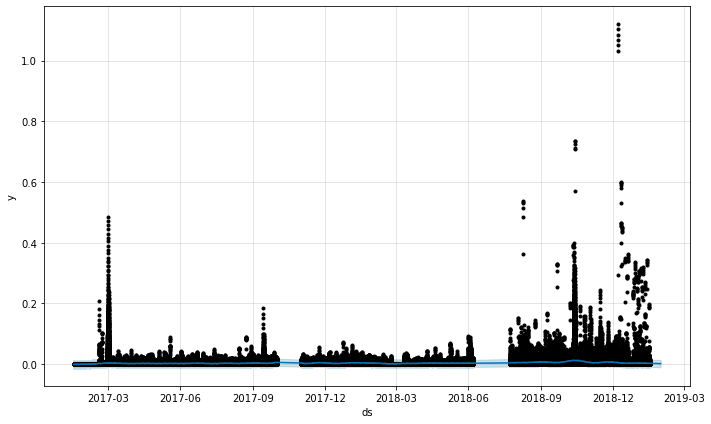

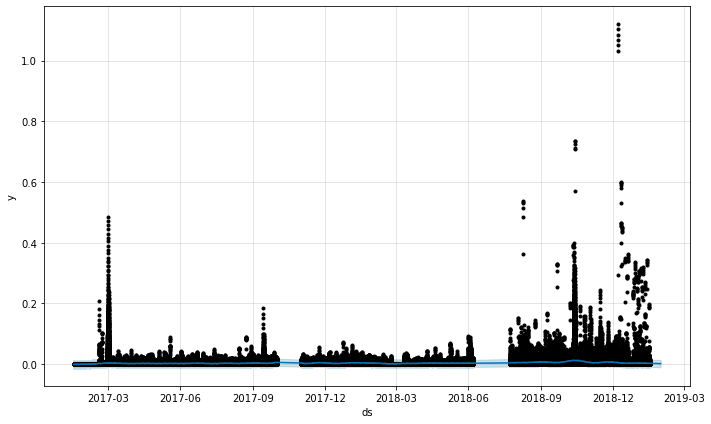

In [9]:
# You can plot the forecast by calling the Prophet.plot method and passing in your forecast dataframe.
fig1 = m.plot(forecast)
fig1

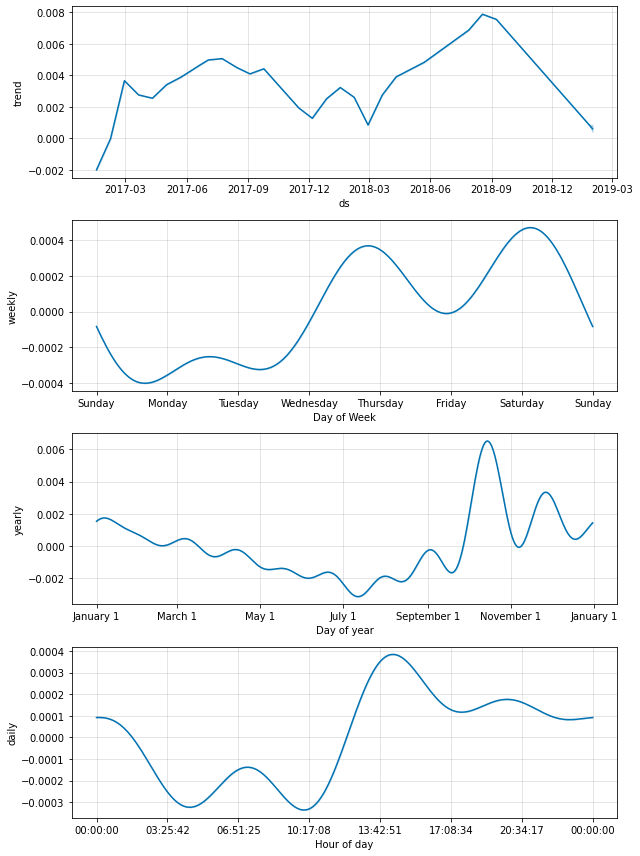

In [10]:
# If you want to see the forecast components, you can use the Prophet.plot_components method.
# By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series.
# If you include holidays, you’ll see those here, too.
fig2 = m.plot_components(forecast)

In [ ]:
# An interactive figure of the forecast and components can be created with plotly. 
# You will need to install plotly 4.0 or above separately, as it will not by default be installed with prophet. 
# You will also need to install the notebook and ipywidgets packages.
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
plot_components_plotly(m, forecast)